# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

# How will Houston Data Science cover the course?
The Stanford online course covers the entire book in 9 weeks and with the R programming language. The pace that we cover the book is yet to be determined as there are many unknown variables such as interest from members, availability of a venue and general level of skills of those participating. That said, a meeting once per week to discuss the current chapter or previous chapter solutions is the target.


# Python in place of R
Although R is a fantastic programming language and is the language that all the ISLR labs are written in, the Python programming language, except for rare exceptions, contains analgous libraries that contain the same statistical functionality as those in R.

# Notes, Exercises and Programming Assignments all in the Jupyter Notebok
ISLR has both end of chapter problems and programming assignments. All chapter problems and programming assignments will be answered in the notebook.

# Replicating Plots
The plots in ISLR are created in R. Many of them will be replicated here in the notebook when they appear in the text

# Book Data
The data from the books was downloaded using R. All the datasets are found in either the MASS or ISLR packages. They are now in the data directory. See below

In [1]:
!ls data

Advertising.csv college.csv     khan_xtrain.csv nci60_labs.csv  wage.csv
auto.csv        default.csv     khan_ytest.csv  portfolio.csv   weekly.csv
boston.csv      hitters.csv     khan_ytrain.csv smarket.csv
caravan.csv     khan_xtest.csv  nci60_data.csv  usarrests.csv


# Youtube videos in the notebook
If you don't feel like going to Stanford Online to watch the videos, you don't have to as all the Youtube videos can be embedded thanks to the Youtube iPython widget in the notebook.

In [2]:
from IPython.display import YouTubeVideo

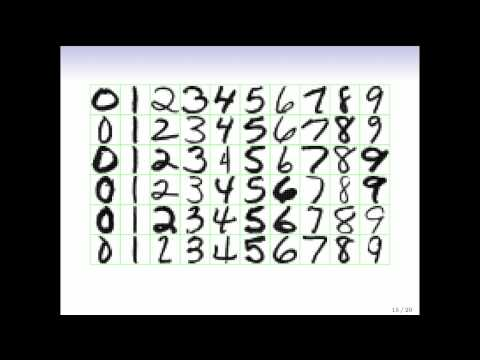

In [3]:
YouTubeVideo("2wLfFB_6SKI")

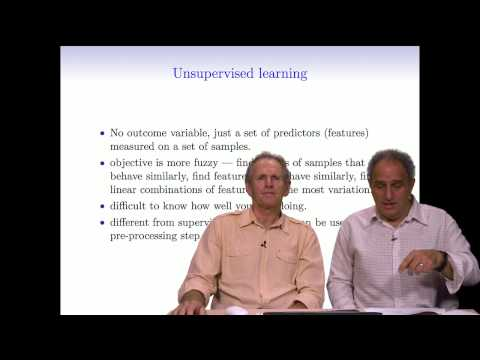

In [4]:
YouTubeVideo("LvaTokhYnDw")

# How to get the most out of the class
Simple, watch the videos and read the chapter before the start of each class and then finish all the assignments at home.

# ISLR Chapter 1
Chapter 1 is short and introduces some of the data, definitions on what is statistical learning, notation and book organization.

**Statistical learning** - understanding data

Two sets of tools  
**Supervised** - Model built to predict an output from a set of inputs  
**Unsupervised** - Learn underlying structure of data

# Wage data introduced
All data is in the data directory. This data was downloaded from the ISLR and MASS R packages

In [1]:
# Bring data into workspace and replicate plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df_wage = pd.read_csv('data/wage.csv')

In [6]:
df_wage = df_wage.drop(df_wage.columns[0], axis=1)

In [8]:
df_wage.head(10)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [9]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.3+ KB


In [10]:
df_wage.describe(include=['O'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [11]:
# Look at all available plotting styles
plt.style.available

['ggplot',
 'seaborn-talk',
 'seaborn-muted',
 'bmh',
 'seaborn-poster',
 'grayscale',
 'seaborn-notebook',
 'seaborn-dark',
 'fivethirtyeight',
 'classic',
 'seaborn-paper',
 'seaborn-colorblind',
 'seaborn-white',
 'dark_background',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'seaborn-bright',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-deep']

In [12]:
plt.style.use("ggplot")

In [13]:
# need to reshape data to plot correctly
df_edu = df_wage.pivot(columns='education', values='wage')

In [14]:
df_edu.head(15)

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN
5,NaN,NaN,NaN,127.115744,NaN
6,NaN,NaN,169.528538,NaN,NaN
7,NaN,NaN,111.720849,NaN,NaN
8,NaN,NaN,118.884359,NaN,NaN
9,NaN,128.680488,NaN,NaN,NaN


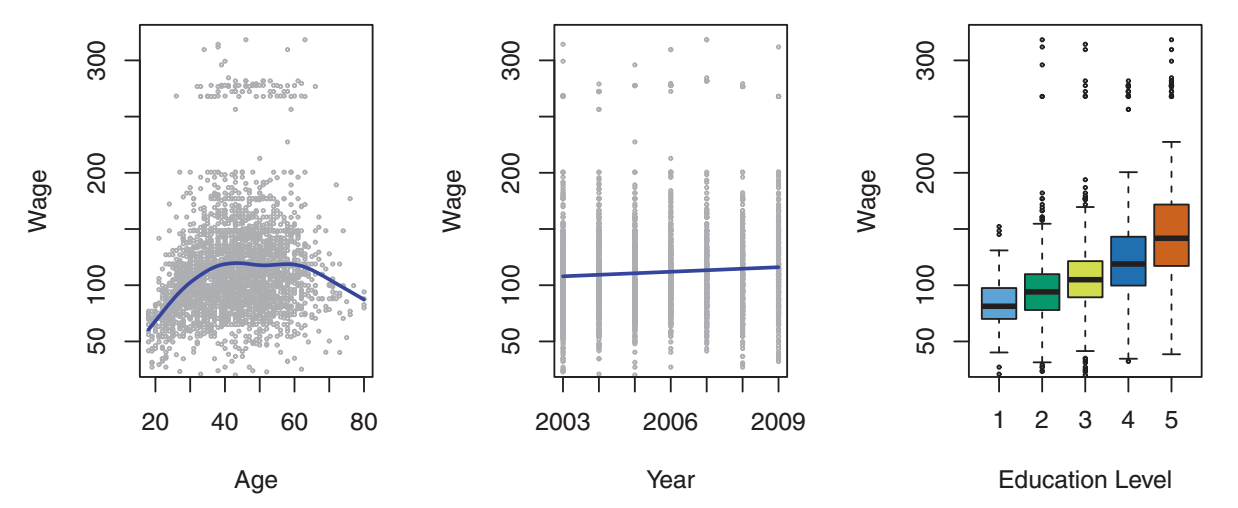

In [17]:
# Image from ISLR
from IPython.display import Image
Image('images/ch1_pg2.png')

# Replicate with matplotlib
Use statsmodels to fit lowess curve in first plot

In [18]:
# importing statsmodels library to fit lowess curve through data
import statsmodels.api as sm

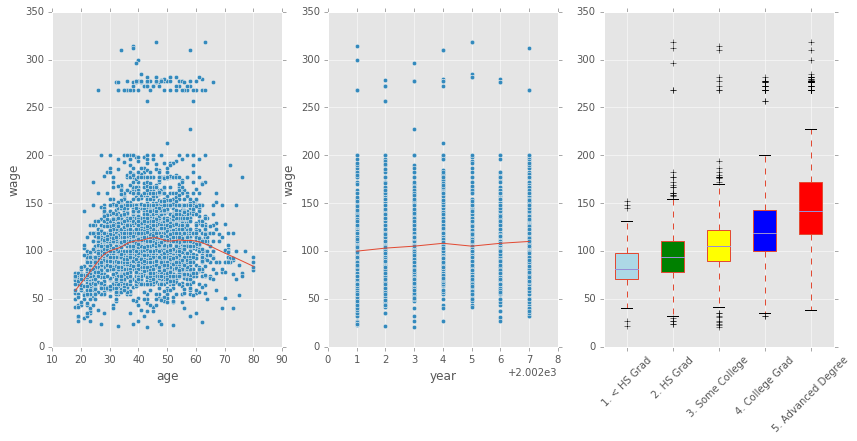

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
df_wage.plot.scatter('age', 'wage', ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])

df_wage.plot.scatter('year', 'wage', ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median)

boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)

# Seaborn for easy, beutiful plotting
[Check their intro page on how to use it](https://web.stanford.edu/~mwaskom/software/seaborn/)

In [2]:
import seaborn as sns

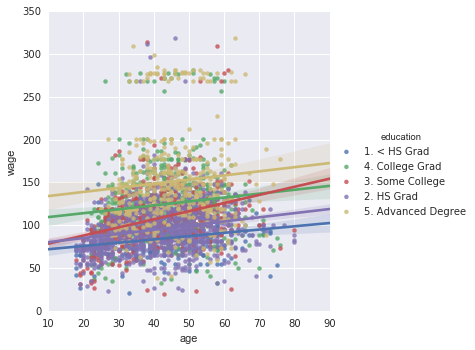

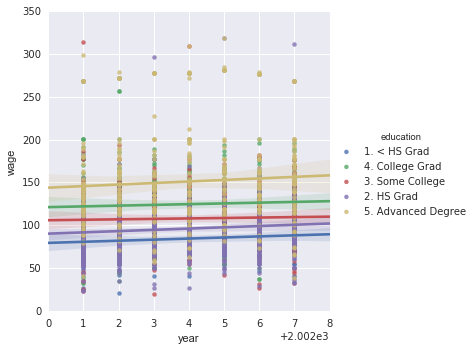

In [21]:
# Similar plots to those above
sns.lmplot('age', 'wage', data=df_wage, hue='education')
sns.lmplot('year', 'wage', data=df_wage, ci=99.99, hue='education');

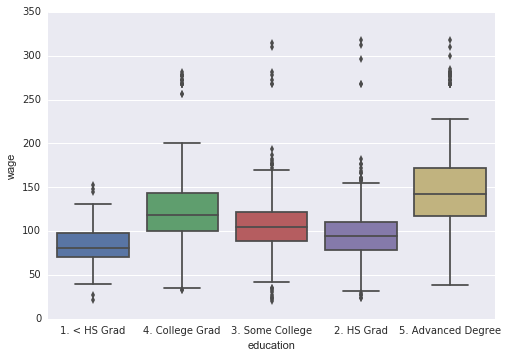

In [22]:
sns.boxplot('education', 'wage', data=df_wage);

In [23]:
df1 = df_wage[['age', 'year', 'education', 'wage']]

In [24]:
df_melt = pd.melt(df1, id_vars=['education', 'wage'])

In [25]:
df_melt.head()

,education,wage,variable,value
0,1. < HS Grad,75.043154,age,18
1,4. College Grad,70.476020,age,24
2,3. Some College,130.982177,age,45
3,4. College Grad,154.685293,age,43
4,2. HS Grad,75.043154,age,50


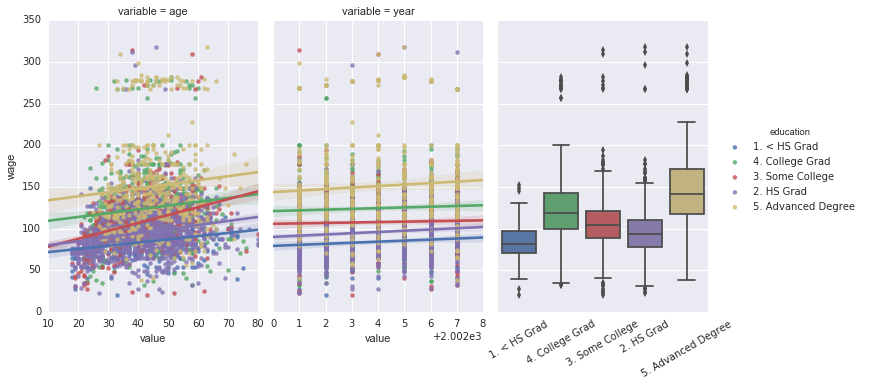

In [26]:
seaborn_grid = sns.lmplot('value', 'wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

sns.boxplot('education', 'wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])

# Regression vs Classification
The wage data above is an example of an output variable being continuous (any number). We call these regression problems. In the data below we explore the stock market data where the goal is to predict whether the stock market will go up or down the next day. The output variable here is categorical and these type of problems are referred to as classification problems.

In [27]:
df_smarket = pd.read_csv('data/smarket.csv', index_col=0)

In [28]:
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [29]:
# Put all lags in one column. Make 'Tidy' Data
df_smarket_pivot = pd.melt(df_smarket, id_vars='Direction', value_vars=['Lag1', 'Lag2', 'Lag3'], 
                           var_name='Lag Type', value_name='Pct Change')

In [30]:
df_smarket_pivot.head()

,Direction,Lag Type,Pct Change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


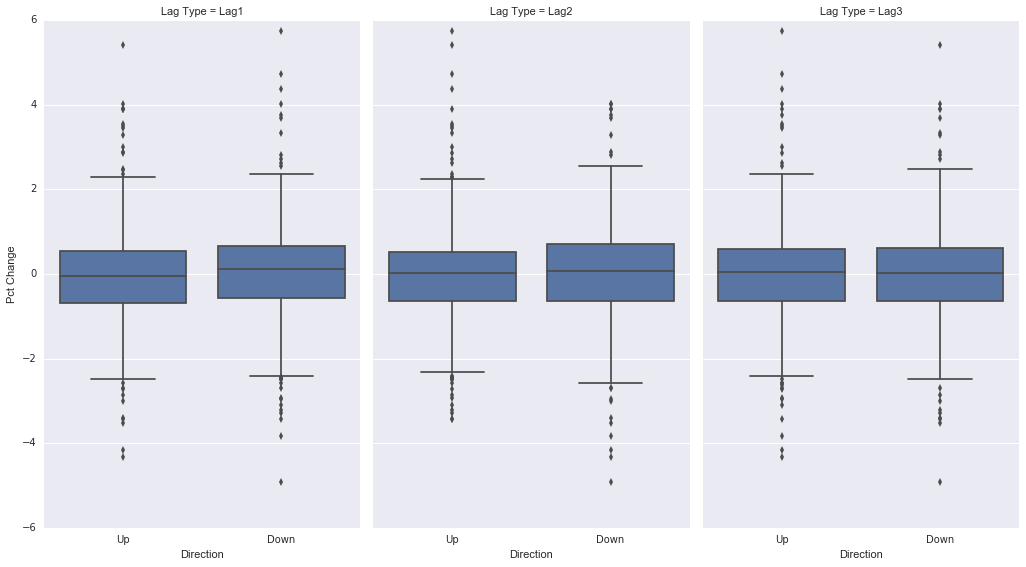

In [32]:
g = sns.FacetGrid(df_smarket_pivot, col="Lag Type", size=8, aspect=.6)
g = g.map(sns.boxplot, "Direction", "Pct Change")

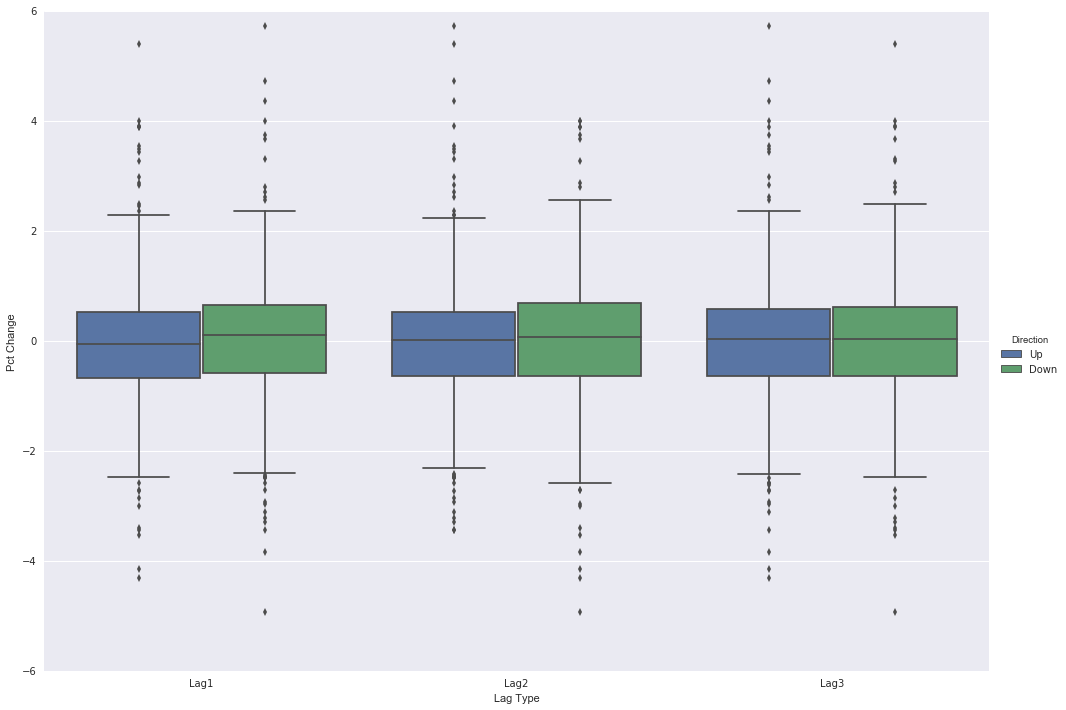

In [33]:
sns.factorplot("Lag Type", hue="Direction", y="Pct Change", data=df_smarket_pivot, kind="box", size=10, aspect=1.4)

# Clustering
No longer interested in prediction - looking to discover underlying similarities in the data

In [34]:
df_genes = pd.read_csv('data/nci60_data.csv', index_col=0)

In [35]:
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(2)

In [38]:
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes), columns=['PC1', 'PC2'])

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(4)

In [41]:
kmeans.fit(df_genes_transformed)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [42]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [43]:
df_genes_transformed['cluster'] = kmeans.labels_

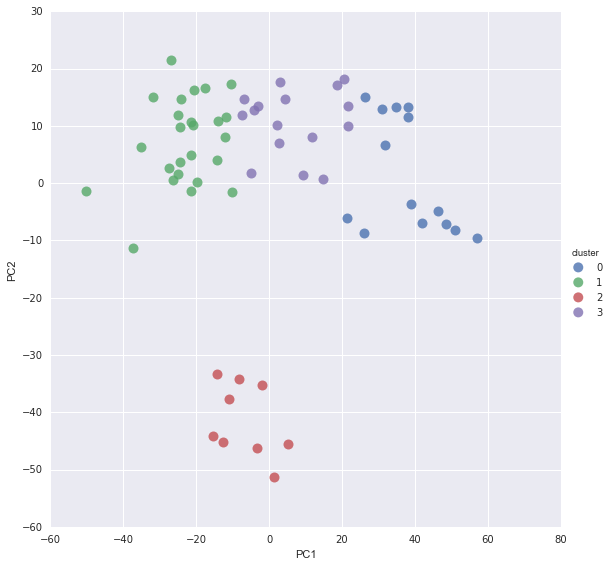

In [44]:
sns.lmplot('PC1', 'PC2', df_genes_transformed, fit_reg=False, hue='cluster', size=8, 
           scatter_kws={"marker": "D", "s": 100})

# History of Statistical Learning
* Early 18th Century - Gauss and Legendre independently discovering the method of least squares
* Sir Francis Galton - Regression to the mean (Tall Parents -> Less tall children), correlation. Cousin of Charles Darwin. Coined term Eugenicist. Discouraged low intelligence people from reproducing
* Karl Pearson - student of Galton. Father of mathematical statistics. Eugenicist and racist
* Ronald Fisher - father of modern stats and experimental design. ANOVA. Also Eugenicist and racist


Machine Learning Timeline
* 1940's: Linear discrimant analysis - First classification method developed by Fisher
* 1950's: Perecptrong and Neural Networks - Frank Rosenblatt
* 1960's: Nearest Neighbor, K-means clustering
* 1970's: Logistic regression
* 1980's: Decision Trees and other non-linear methods
* 1990's: Support Vector Machines(Vapnik)
* 2000's: Random Forest (Brieman), Deep Learning (Hinton)

# Elements of Statistical Learning
A book preceding ISLR by the same authors was one of the first to comprehensively cover machine learning. ESL is quite dense and for the advanced machine learning student. ISLR avoids the greusome math details and focuses on the most practical and widely used methods while using a non-threatening level of math for explanations.


# ISLR Premises
* Statistical Learning should not be a black box - Should know the use cases, the pros and cons of each method and how they are implemented

* Desire to solve real world problems - each programming assignment will have realistic use case

# Background Knowledge
* Basics of matrix algebra
* Basics of probability and statistics
* Specifically - linear regression

# Notation
* `n`- number of observations
* `p` - number of features (parameters)

# Chapter by Chapter
2: Basics of stat learning and K Nearest Neighbor  
3: Linear Regression  
4: Logistic Regression and Linear Discriminant Analysis  
5: Crossvalidation and bootstrapping  
6: Regression improvements - stepwise regression, regularized regression and others  
7: Non-linear methods - Polynomial regression, splines, general additive models  
8: Decision Trees and Random Forests - bagging/boosting  
9: Support Vector Machines  
10: Unsupervised Learning- Principal components analysis and clustering

# Chapter 2: Statistical Learning

## Advertising Data
The advertising data consists of product sales from 200 markets and their associated tv, radio, and newspaper advertising budgets. What kind of relationship can be seen between advertising budget and sales

In [46]:
df_adv = pd.read_csv('data/Advertising.csv', index_col=0)

In [47]:
df_adv_new = pd.melt(df_adv, value_vars=['TV', 'Radio', 'Newspaper'], id_vars='Sales', value_name='adv_budget')

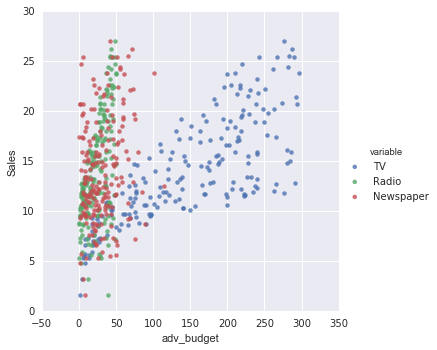

In [48]:
sns.lmplot('adv_budget', 'Sales', data=df_adv_new, hue='variable', fit_reg=False);

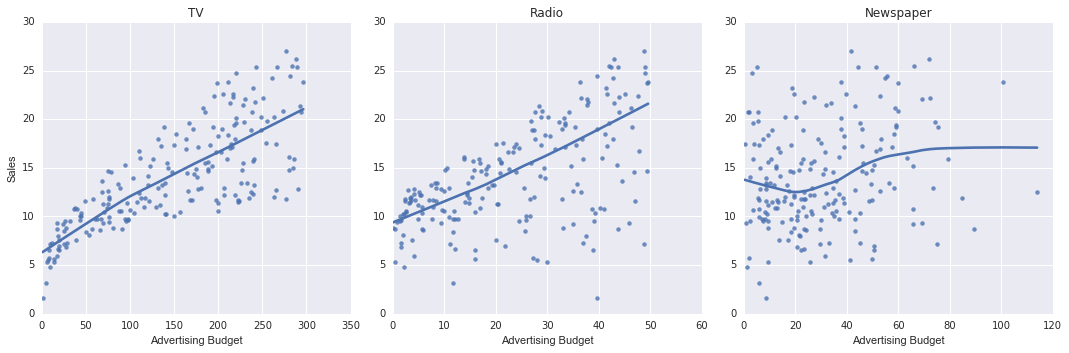

In [49]:
lm = sns.lmplot('adv_budget', 'Sales', data=df_adv_new, col='variable', sharey=False, sharex=False, lowess=True);
axes = lm.axes
for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel('Advertising Budget')

## Variable Types
TV,radio and newspaper are input variables. Also known as features, predictors or independent veariable  
Sales is the output, target or response variable

## General form of linear model
We can quantify the relationship between input and output with the following linear model

$$y = f(X) + \epsilon$$

Where $X$ is the input matrix of predictors and $\epsilon$ is some random error. $f$ is some fixed but unknown systematic relation between $X$ and $Y$. Statistical learning is trying to approximate this function $f$

# Estimating $f$ for prediction and/or inference
**Prediciton**: Try to find a function $\hat{f}$ that closely matches $f$. Not that concerned about the shape or decipherability of $f$. Just want a good prediction for each input.

**Inference**: Want to understand the relationship between $X$ and $Y$. How does changing one parameter change the output. Finding only the important predictors. What type of model to use (linear vs non-linear)?

# Irreducible and Reducible Error
**Reducible Error** - This is the difference between $f$ and $\hat{f}$. In practice $f$ is never known so we will never be able to accurately measure this but this error can still be reduced by finding the best ML method to do the learning.

**Irreducible Error** - Even if you were to perfectly estimate $f$ you would still have error in your prediction as $f$ has inherent randomness in it.

The book focuses on minimizing the reducible error - finding that model $\hat{f}$ that closely matches $f$

## Parametric methods
* An assumption about the functional form is made $Y = \beta_0 + \beta_1X_1$ + ...
* Since mode form is linear, fitting is easier and usally fast
* Need to estimate parameters. Many ways to do this. Most popular is least squares
* Unlikely that the true form of $f$ is linear

## Flexible model
* Greater number of parameters
* Potential to overfit - memorizing data by following noise

## Nonparametric
* No functional form of $f$ is given. Meaning they can wiggle all over the place
* A very large number of parameters is needed.
* Fitting is more computationally intensive
* Potential to overfit

Trade-off between interpretability and flexibility. The more flexible a model is, the less-likely you are to be able to inerpret it. It becomes increasing more difficult to determine how the parameters are affecting the model the more flexible it is. Lasso regression is very inflexible as it forces some coefficients to 0

# Stopped here

# Supervised vs Unsupervised Learning
**Supervised** - for every observation there is a corresponding response variable - fit a model

**Unsupervised** - No response variable for the observations - clustering

**Semi-supervised** - Some of the observations have responses - others don't. Not covered in book

**Reinforcement Learning** - Reward/Punishement for certain actions that are taken. Learns from this and repeats. Not in book

# Regression vs Classification Problems
Variables are classified as quantitative or qualitative  
**Quantitative** - Take on numerical values  
**Qualitative** - Take on categorical value  

Regression problems are those with quantitative responses  
Classificaiton problems are those with qualitative responses

Some confusion can arise. For instance, logistic regression is used for classification problems yet obviously has the term 'regression' in it. The reason this is so, is because logistic regression outputs probabilities that each observation is in a certain class. Probabilities are quantitative values between 0 and 1, and thus you have a 'regression'

Some algorithms such as K nearest neighbor, random forests, support vector machines can be used for both classification or regression purposes

# Assessing model accuracy
No one model works best - though some seem to think a grand unigying [master algorithm is on the way](https://www.amazon.com/Master-Algorithm-Ultimate-Learning-Machine/dp/0465065708).

## Measuring quality of fit
There are different ways to measure how well a supervised learning problem fit the data. For a classification problem we can simply find the percentage of observations that had the correct class predicted. For regression problems we could simply take the absolute value of the difference between the prediction and the actual ouput and take the average of this. $\sum{|f - \hat{f}|}/n$ 

### Mean squared error
Although the mean absolte error is a good intuitive metric, the standard is mean squared error(MSE). $$\sum{(f - \hat{f})^2}/n$$

Typical software regression implementations find the value of the parametrs that minimize the MSE. 

# Training Data vs Testing Data
**Training Data** - Data used to build a prediction model. Should not be used to validate the model.  
**Testing Data** - Data used to determine the usefullness of the model. Validates the model. This data is unseen during model building phase.

We want lowest test MSE. Don't care too much about training MSE.
During the training phase it's usually possible to fit a model that has no error. Such a model would be highly flexible and not fit well on new data is it simply memorized the noise/error. There is no guarantee that a model with low training MSE will have the same test MSE.

In [342]:
num_points = 30

In [436]:
x = np.linspace(1,13, num_points).reshape(-1, 1)
error = np.random.randn(num_points, 1) * 30
f = lambda x: (x - 2) * (x - 6) * (x - 12)

y = f(x) + error

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split

In [438]:
poly = PolynomialFeatures(degree=10)
X = poly.fit_transform(x)

In [453]:
obs_nums = np.arange(0, 30)
np.random.shuffle(obs_nums)

top_70 = int(num_points * .7)
rand_train = np.sort(obs_nums[:top_70])
rand_test = np.sort(obs_nums[top_70:])

In [468]:
X_train = X[rand_train]
X_test = X[rand_test]
y_train = y[rand_train]
y_test = y[rand_test]

In [527]:
linreg = LinearRegression()
linreg.fit(X_train[:, :2], y_train)
y_train_2 = linreg.predict(X_train[:, :2])
y_test_2 = linreg.predict(X_test[:, :2])

linreg.fit(X_train[:, :4], y_train)
y_train_4 = linreg.predict(X_train[:, :4])
y_test_4 = linreg.predict(X_test[:, :4])

linreg.fit(X_train, y_train)
y_train_10 = linreg.predict(X_train)
y_test_10 = linreg.predict(X_test)

In [528]:
errors_train= np.array([np.mean((y_train - y_train_2) ** 2),
                  np.mean((y_train - y_train_4) ** 2),
                  np.mean((y_train - y_train_10) ** 2)])
errors_train = np.column_stack(([2, 4, 10], errors_train))

errors_test = np.array([np.mean((y_test - y_test_2) ** 2),
                  np.mean((y_test - y_test_4) ** 2),
                  np.mean((y_test - y_test_10) ** 2)])
errors_test = np.column_stack(([2, 4, 10], errors_test))

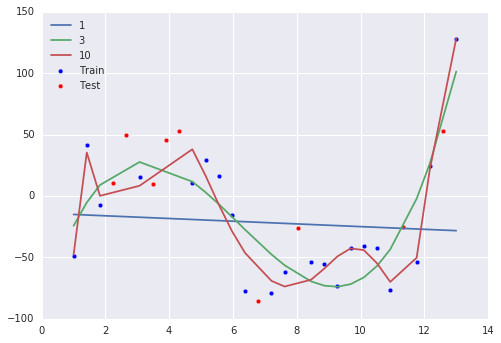

In [532]:
plt.scatter(X_train[:,1], y_train, c='b', label='Train')
plt.scatter(X_test[:,1], y_test, c='r', label = 'Test')
plt.plot(X_train[:,1], y_train_2, label = '1')
plt.plot(X_train[:,1], y_train_4, label = '3')
plt.plot(X_train[:,1], y_train_10, label = '10')
plt.legend(loc=2);

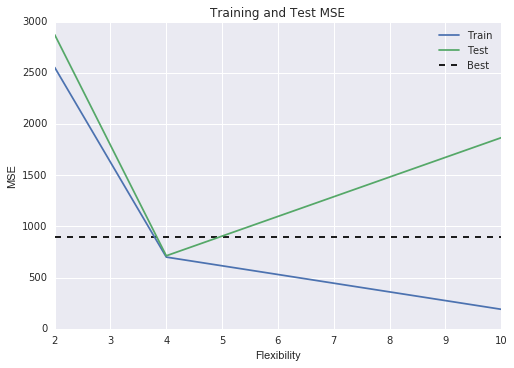

In [545]:
plt.plot(errors_train[:, 0], errors_train[:, 1], label = 'Train')
plt.plot(errors_test[:, 0], errors_test[:, 1], label = 'Test')
plt.hlines(900, 2, 10, label = 'Best', linestyle = '--')

plt.legend()
plt.title("Training and Test MSE")
plt.xlabel('Flexibility')
plt.ylabel('MSE');

## Problem (advanced)
<span style="color:green">Write a function that a takes a list/array of how many parameters to fit a linear regression model for the above data and outputs the two plots above.</span>

### Best possible MSE 
In theory this should be the var(random error). Or in this problem the variance of the normal distribution used which was 900.

In [546]:
# in reality
np.mean((y - f(x)) ** 2)

898.10344283641234

### Training MSE will always decrase with more flexibility
As a model has more access to features - i.e. is more flexible, it will be able to fit the data better, so no matter what, the training MSE will always decrease as more feature are added to the model

### Overfitting
When the test MSE of a more flexible model surpasses the test MSE of a lesser flexible model, overfitting is occurring. Random patterns are beginning to be picked up by the model.

# Bias Variance Tradeoff
In normal human communication the word **bias** typically means your inherent predjudice against someone or some thing. In statistical learning, when the term **bias** is used we mean the measure of how much a simpler model deviates from the actual theoretical 'truth'. So **low bias** would simply mean that the chosen model does a good job approximating the current model complexities and **high bias** would mean a model unable to explain model complexities.

**Variance**, a word more domain-specific to statistical learning, represents the degree to which your model, $\hat{f}$ would change when given new training data. Think about coming up with 100 different models for 100 different training sets and plotting them all on one plot. The more scatter in the plot, the higher the variance.

## Low bias and low variance
We would like to have as low bias and variance as possible since low bias would mean our model approximates the true relationshipe, $f$ well and low variance since we don't want our model changing much depending on which data it gets trainined on.

## Reality
It's generally very difficult to achieve a model with both low bias and low variance and its quite easy to achieve one without the other. A low bias model can be generated by fitting a highly flexible model with many degrees of freedom and with enough degrees of freedom should have 0 error. But models like this will likely highly overfit to the randomness of the data and look very different for a new training.

On the other hand, achieve a model with low variance is quite easy. A model with a very low number of degrees of freedom, like a simple linear regression, should not change much from training sample to training sample. This stability from model to model would represent low variance.

## The tradeoff
![tradeoff](images/1-bias-variance-tradeoff.jpg)
The image perfectly illustrates the general idea of the bias-variance tradeoff. As model complexity grows, bias decreases (sometimes to 0) and variance increases (sometimes to laughably bad models). The goal is to find a balance.

# Classification Error
The focus of the examples in the book thus far have been on regression problems, those with numbers as outputs. Many problems are classificaiton problems, those with categories as output. A very simple and intuitive way to assess your model for classification is find the percentage of obsrevations that you classified correctly. This is just like seeing how many answers you got right in a test. There are more metrics that can be calculated for classification problems and those will be discussed in later chapters.

Again, as in regression, the only real way to determine how well your model is, is to measure the test error rate. Thats the error rate on data that was not used to train the model. The unseen observations.

## Conditional probability
If we know the distribution of how are observations were created - $f$ has a known probability distribution - we can simply use basic conditional probability to determine what class is the most likely. For instance, if we had two fair dice, we would always guess 7 as the total for the sum of the dice since it is most likely. But in real life we nearly never have a situation where the probability distributions of the observations are known beforehand.

# K-Nearest Neighbors
KNN is an attempt to estimate the local probability distribution of an observation by simply counting up the classes of all of its neighbors and using that empirical tally as its probability distribution for that particular observation. The 'K' is simply the number of neighbors each point will observe before reaching it conculsions as to what its local probability distribution will be.

KNN is one of the simplest algorithms and requires no pre-training. Here is the way it works
1. For each observation, find its closest neighbors based on some distance function (euclidean, cosine, etc...)
2. Each of these neighbors 'casts' a vote for which class its in
3. Tally up the votes and this is your local probability distribution
4. Choose the highest vote getting class as a prediction for the current observation

![knn](images/knn.gif)

The example above shows of the 3 closest neighbors, 2 are of class B and 1 is of class A so therefore the local probability disribution for the questionable point would be B: 2/3 and A: 1/3 and KNN would predict the class to be B

## Choosing K
K is usually chosen by a method called cross validation which will be discussed later. But in general choosing a K to be very large, lets say as large as the number of observations, would simply have the algorithm pick the most common class and all prediciotns would be the same class. On the opposite end of the spectrum, choosing k = 1 would introduce lots of randomness (variance) as the prediciton is based solely on one data point.

# End of Chapter 2
That ends the notes on Chapter 2.

The text proceeds with an introduction to R, which will obviously be skipped since this is an effort to use python as the language of choice in answering the problems. We will no go straight into the exercises.

# Chapter 2 exercises
There are 10 problems starting at page 52

## Solutions
It's highly suggested to attempt the problems from each chapter before looking at solutions.

Many peopele have posted solutions online. Google "ISLR solutions". 

# Problem 1
**1a.** Flexible model: The large number of observations would prevent the model from following the outlier/noise. The number of predictors being small would also help with the model  
**1b.** Inflexible model: With a very large number of predictors its possible to achieve low bias. A low number of observations would introduce lots of variance as randomness would be picked up as a signal very easily.  
1c. Flexible model: An inflexible model by definition cannot model complex relationships  
1d. Inflexible model: Flexible models follow noise and since noise is high this would not be ideal

# Problem 2
2a. Regression, inference, 500 x 3  
2b. Classification, prediction, 20 x 13  
2c. Regression, prediciton, 52 x 3

# Problem 3
3a. Hand-picked points to show the 5 curves

In [7]:
bias = np.array([6, 4, 2, 1, .5, .1])
variance = bias[::-1]
training_error = bias * 1.1
test_error = np.array([7, 5, 2, 2, 5, 7])
irreducible_error = np.ones(6) * 1.5

In [8]:
df_3 = pd.DataFrame({'bias': bias,
              'variance':variance,
             'training_error': training_error,
             'test_error':test_error,
             'irreducible_error': irreducible_error})

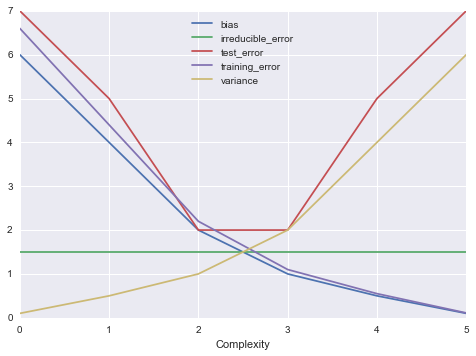

In [9]:
df_3.plot()
plt.xlabel('Complexity')

3b. 
* Bias- When using an inflexible model, it is unlikely that the chosen model will closely match how the real-life situation. Adding flexibility will allow for a much closer aligment between model and reality  
* Variance increases as flexibility increases since more flexibility allows for more noise to be fit  
* Training error could decrease to 0 as flexibility increases as it becomes possible to model most all of the error.
* Test Error might initially decrease until a certain flexibility is reached and then overfitting will inevitably occur and error will start increasing again  
* Irreducible error is constant random noise that is inherent in the data.

# Problem 4
a) Three real world classification problems
* The postal service determining which character an address is. Prediction.  
* Determining if a movie review is positive, negative or neutral. Inference
* Determining whether a tumor is cancerous or not. Both

b) Three real world regression problems  
* Tomorrows stock price. prediction
* Next months GDP. inference
* Probability of default on credit card. both. Although this is typically framed as a classification problem. The probability itself is real-valued and thus can be thought of as a regression.  

c) Three cluster problems
* Finding similar groups of stocks strictly based on their price movements
* Finding similar groups of products bought at a grocery store
* Finding similar groups of news articles by topic


# Problem 5
Advantages of a very flexible model is its ability to model a very complex relationship between input and response. Very flexible models are prone to overfitting - modeling the error and not the signal. More flexible models are preferred when there is a greater sample of data to train on and the relationship is non-linear. Less flexible models are preferable with smaller data, large number of features relative to observations and a simpler, usually linear relationship between predictors and response.

# Problem 6
Parametric approach locks you into a model with a certain structure. You are limited by the constraints of the model. Advantags are simplicity, direct inference of predictors and less computational time to find coefficients to describe model. Disadvantage is the lack of flexibility. Real-life situation might not meet model assumptions.

# Problem 7

In [12]:
df_7 = pd.DataFrame({'x1': [0, 2, 0, 0, -1, 1], 'x2':[3, 0, 1, 1, 0, 1], 'x3':[0, 0, 3, 2, 1, 1], 
                     'y':['R', 'R', 'R', 'G', 'G', 'R']})
df_7

,x1,x2,x3,y
0,0,3,0,R
1,2,0,0,R
2,0,1,3,R
3,0,1,2,G
4,-1,0,1,G
5,1,1,1,R


In [38]:
# PART a
# Get x1, x2, x3 from the above dataframe. Subtract (0, 0, 0) from it and square each dimension
dist = (df_7.values[:, :3] - np.array([0, 0, 0])) ** 2

# Sum across the rows and make sure the type is float
summed_distance = dist.sum(axis=1).astype('float')

# Take square root to get euclidean distance
euclidean_dist = np.sqrt(summed_distance)
euclidean_dist

array([ 3.        ,  2.        ,  3.16227766,  2.23606798,  1.41421356,
        1.73205081])

## Part b
with k = 1 the nearest neighbor is the 5th point (-1, 0, 1) at a distance of 1.4 from (0, 0, 0). This point is labeled Green, so we predict Green

## Part c
With k = 3 the three nearest neighbors are points 5, 6 and 2. Points 6 and 2 both have Red as their label so we would predict Red.

## Part d
If the true descision boundary is non-linear than a smaller k would do better and be more flexible and allow for local changes to contribute more to the prediction.

# Problem 8

## Part a and b

In [43]:
df_college = pd.read_csv('data/college.csv', index_col=0)
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Part c

In [44]:
# i
df_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


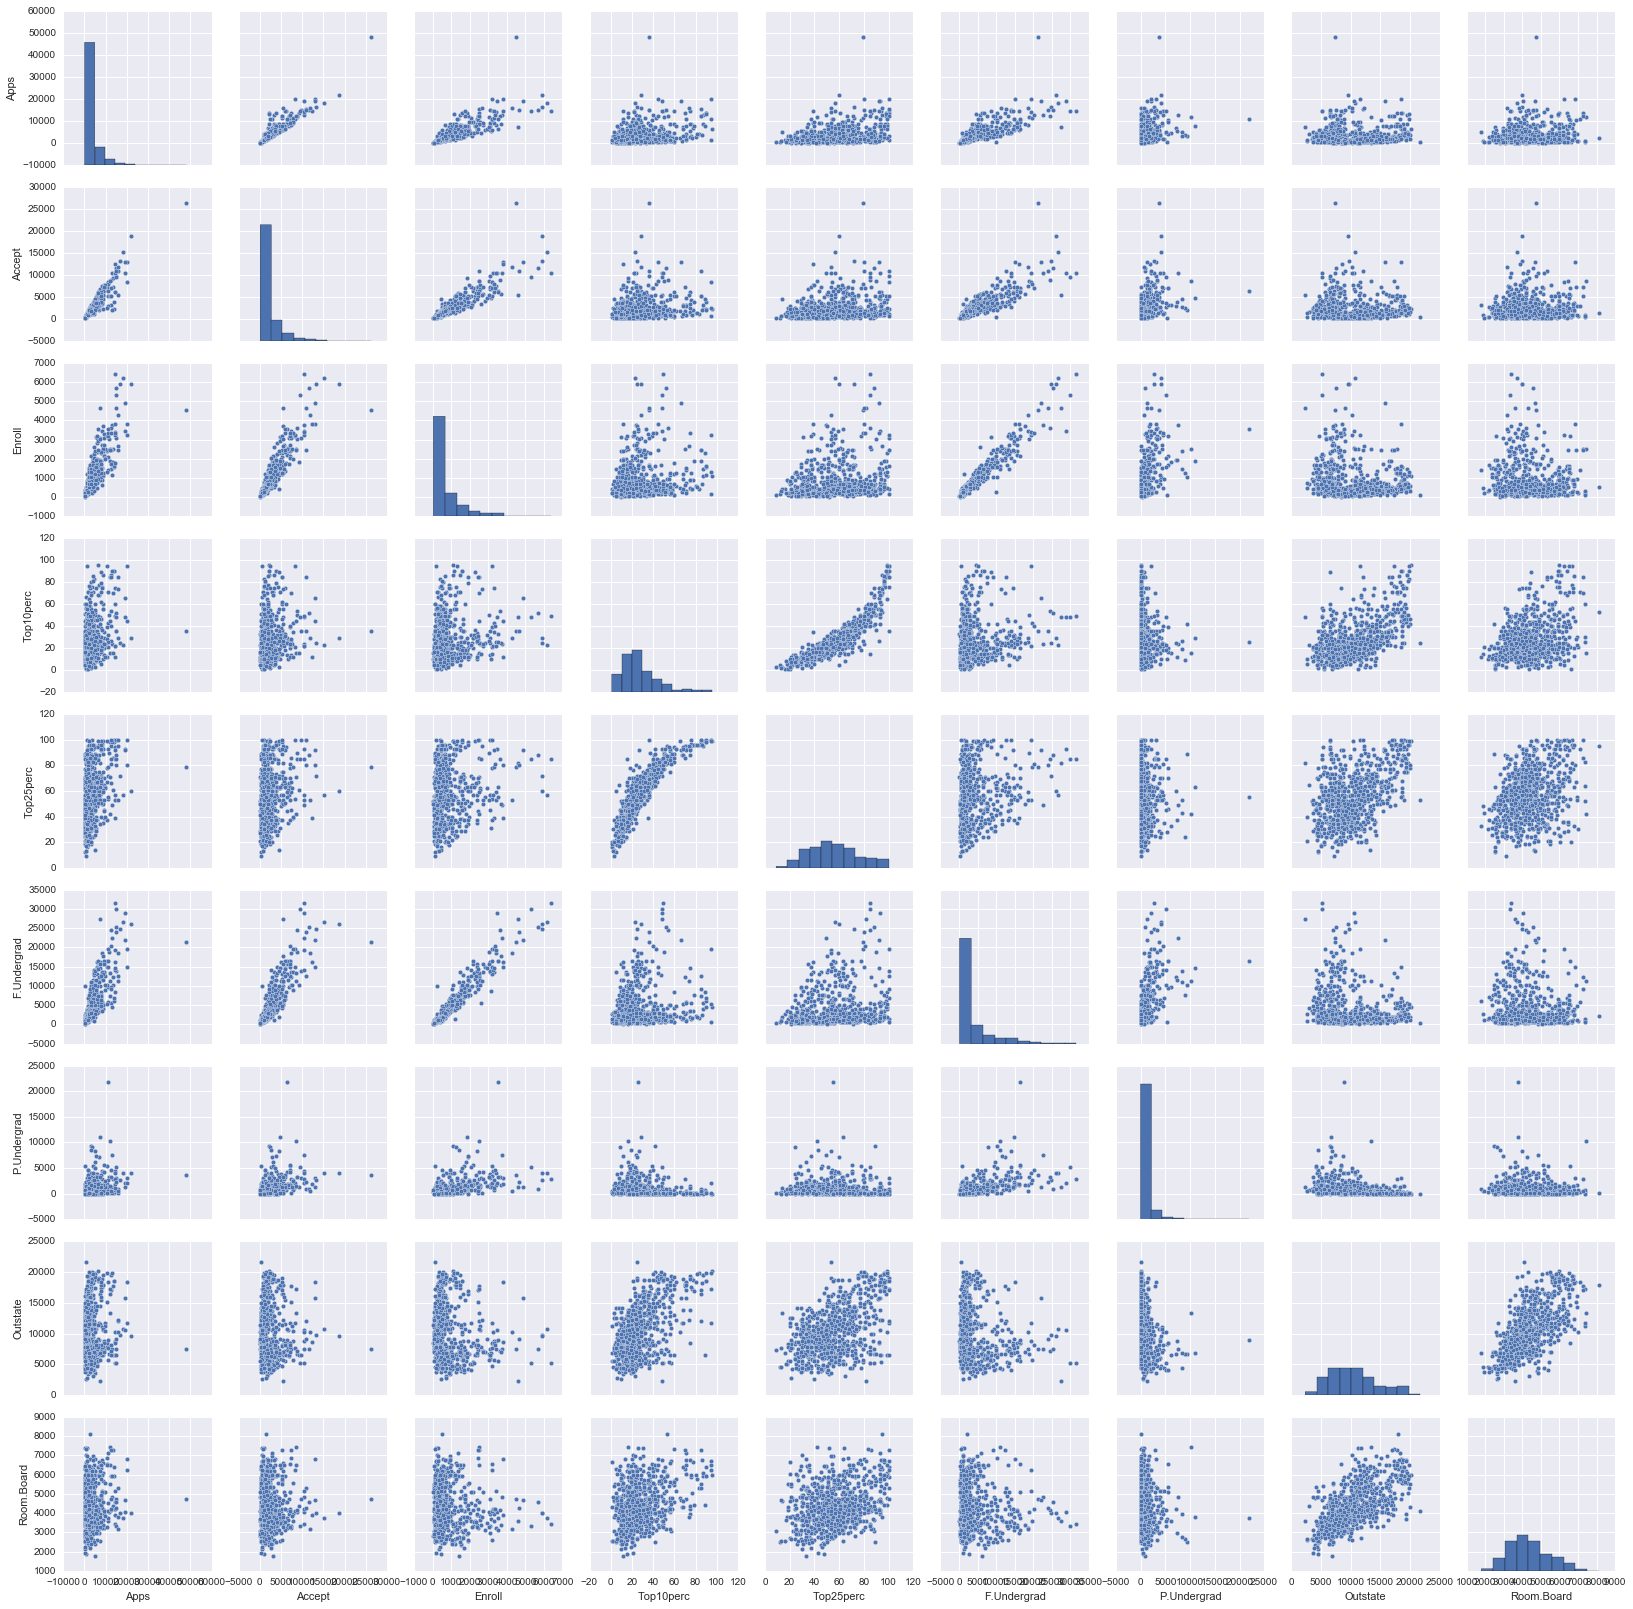

In [52]:
# ii
sns.pairplot(df_college.iloc[:, :10]);

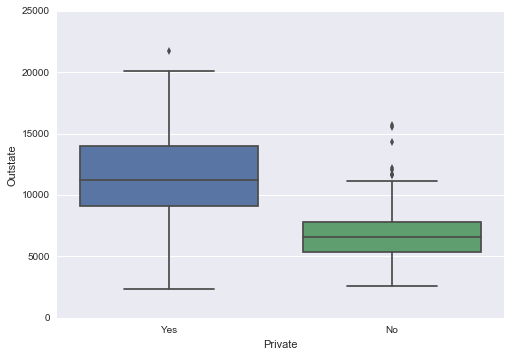

In [51]:
# iii
sns.boxplot('Private', 'Outstate', data=df_college);

No     699
Yes     78
Name: Elite, dtype: int64


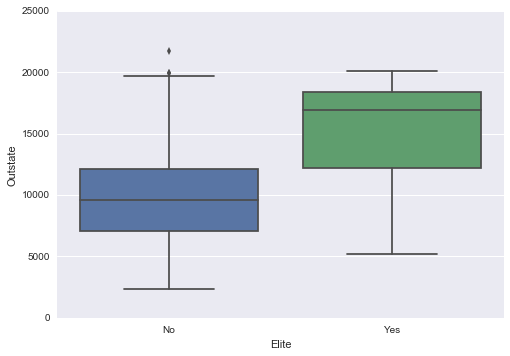

In [191]:
# iv
# Next line produces No/Yes categories based on a boolean(0/1) and saves it as a DataFrame column
df_college['Elite'] = pd.Categorical.from_codes(df_college['Top10perc'] > 50, ['No', 'Yes'])
print(df_college['Elite'].value_counts())
sns.boxplot('Elite', 'Outstate', data=df_college);

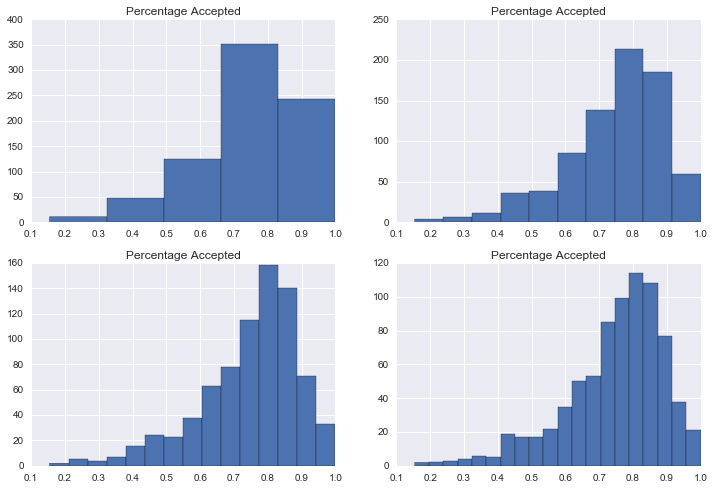

In [210]:
# v
fig , ax = plt.subplots(2, 2, figsize=(12,8))
ax[0, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=5)
ax[0, 0].set_title('Percentage Accepted')

ax[0, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=10)
ax[0, 1].set_title('Percentage Accepted')

ax[1, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=15)
ax[1, 0].set_title('Percentage Accepted')

ax[1, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=20)
ax[1, 1].set_title('Percentage Accepted');

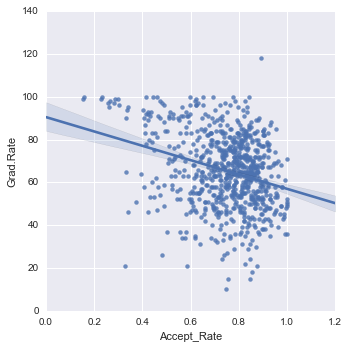

In [215]:
# vi
# Acceptance rate and Graduation rate are negatively correlated
df_college['Accept_Rate'] = df_college['Accept'] / df_college['Apps']
sns.lmplot('Accept_Rate', 'Grad.Rate', data=df_college);

# Problem 9

In [4]:
df_auto = pd.read_csv('data/auto.csv', index_col = 0)

In [6]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


a) Quantitative vs Qualitative Predictors  
Quantitative - mpg, cylinders, displacement, horsepower, weight, acceleration  
Qualitative - year, origin, name

In [10]:
# b and c - get the range and std of each quantitative predictor
df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
# d
pd.concat((df_auto.iloc[:10], df_auto.iloc[85:])).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,101.000000,75.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,146.000000,90.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.500000,6.000000,250.000000,115.000000,3520.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


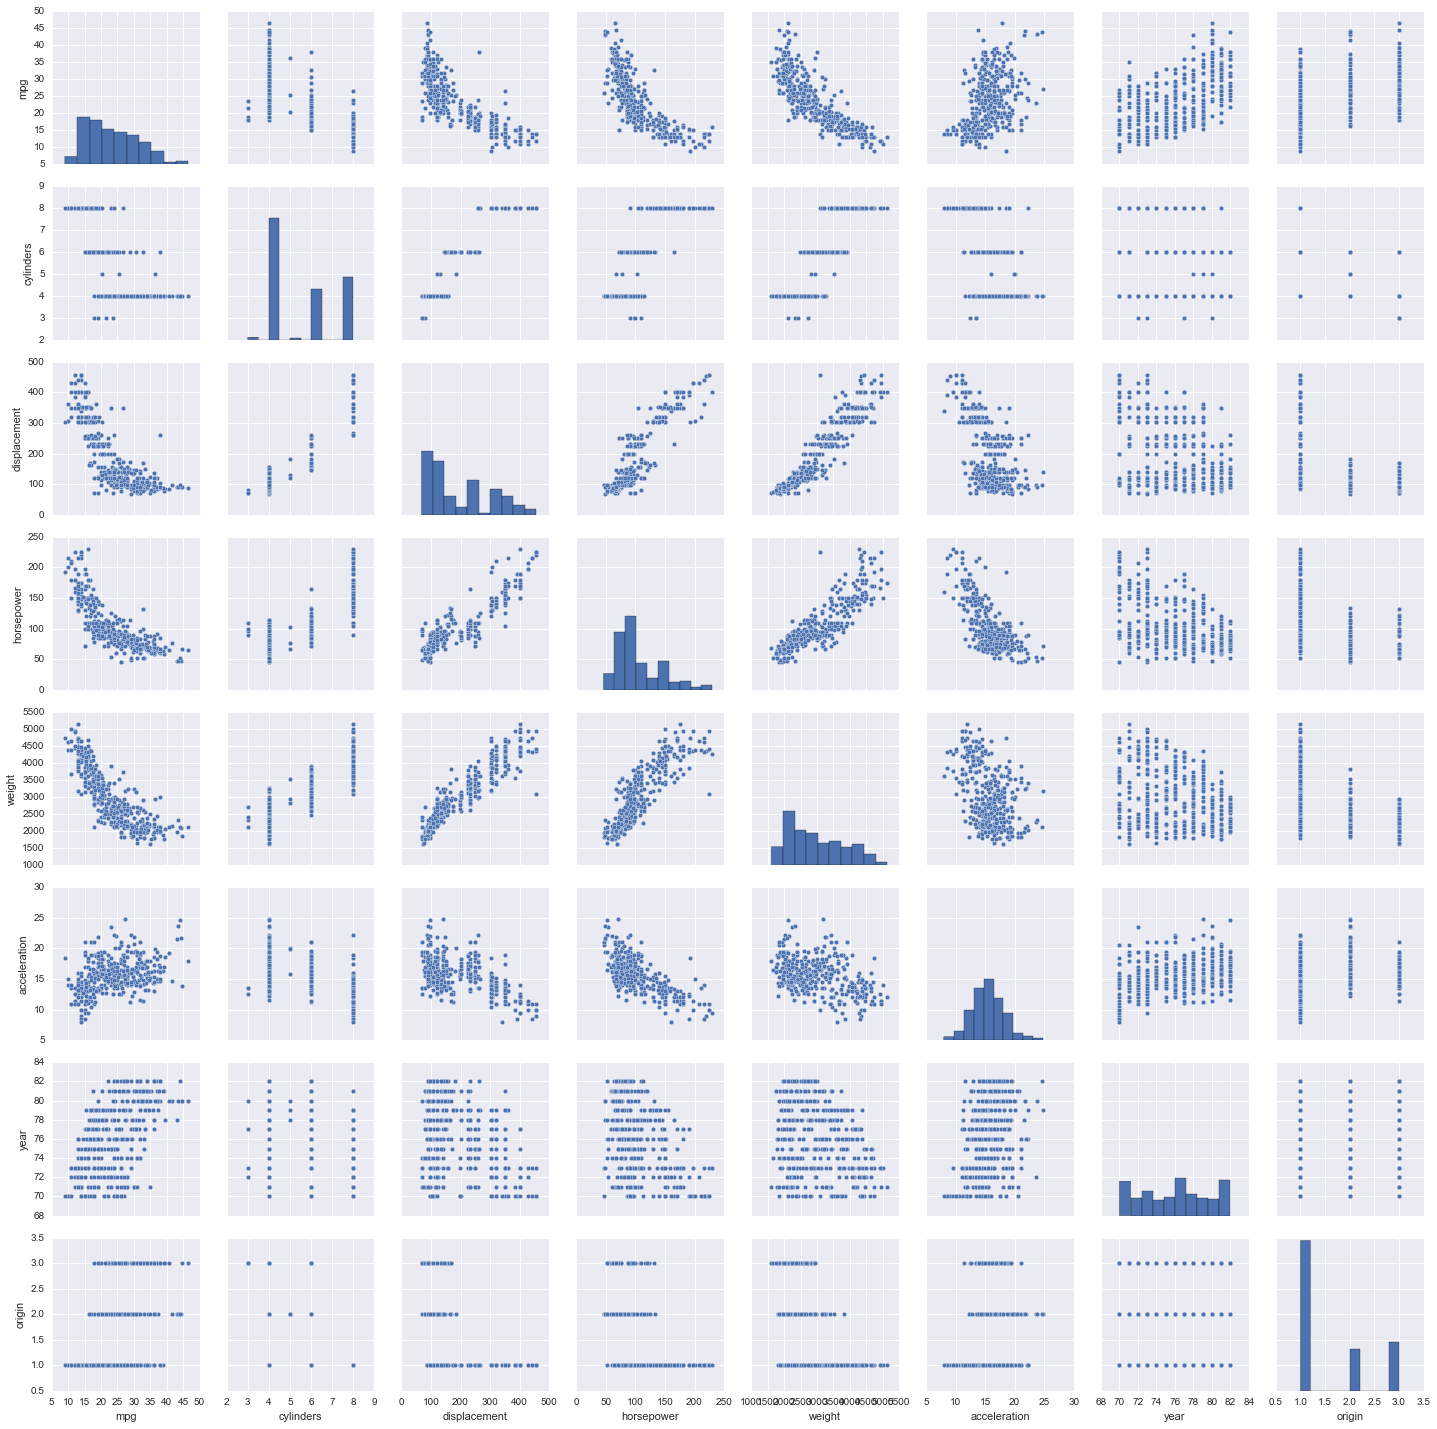

In [18]:
# e
# Horsepower and displacement have a very strong postive linear relationship. Horsepower and mpg 
# have a strong negative relationship
sns.pairplot(df_auto)

f) Looking at the pair plots above, mpg seems to have some relationship with just about all the other predictors.

# Problem 10

In [21]:
df_boston = pd.read_csv('data/boston.csv', index_col=0)

In [23]:
df_boston.shape

(506, 14)

This data frame contains the following columns:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.



In [35]:
# The pair plot is too large. Lets plot correlations and 
df_boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


c) There are no very strong relationships (> .9) with crime. The highest two are **rad**, **tax** and **lstat**. Crime is correlated with density of population (from what I've read before) so rad might be representative of how dense the population is if you are close to highways. Tax rates are generally higher the closer you are to a city center so higher tax rates might imply denser populations. And lower statsus (lstat) makes sense since more crime is committed by those less well off.

d) Below are the towns that have a max for each of the predictors. Seems there are some limitation in the data such that 132 towns have exactly 24 as a value for rad and 121 towns have exactly 396.9 as a value for black. Crime also seems to be strangely distributed with nearly all values hovering around 0 and a few serveral orders of magnitude greater.

In [45]:
df_boston.loc[df_boston.idxmax().unique()].style.highlight_max()

In [51]:
(df_boston['rad'] == 24).sum(), (df_boston['black'] == 396.9).sum()

(132, 121)

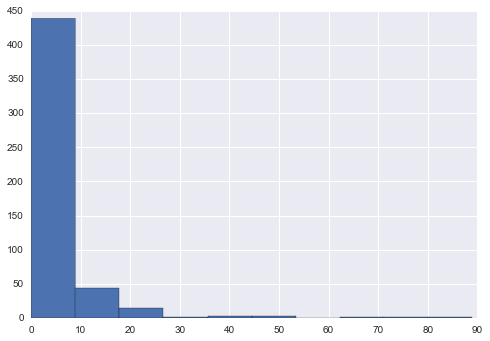

In [54]:
plt.hist(df_boston['crim']);

In [55]:
# e
df_boston['chas'].sum()

35

In [56]:
# f
df_boston['ptratio'].median()

19.05

In [59]:
# g
# rad and black are both those suspicious maximum values and crim is a ridiculous outlier. More evidence
# of bad data
df_boston.loc[df_boston['medv'].idxmin()]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 399, dtype: float64

In [60]:
# h
(df_boston['rm'] > 7).sum(), (df_boston['rm'] > 8).sum()

(64, 13)

In [66]:
pd.DataFrame({'More than 8 rooms': df_boston[df_boston['rm'] > 8].describe().loc['50%'], 
              '8 or less rooms' : df_boston[df_boston['rm'] <= 8].describe().loc['50%']})

,8 or less rooms,More than 8 rooms
crim,0.24522,0.52014
zn,0.00000,0.00000
indus,9.69000,6.20000
chas,0.00000,0.00000
nox,0.53800,0.50700
rm,6.18500,8.29700
age,77.30000,78.30000
dis,3.21570,2.89440
rad,5.00000,7.00000
tax,334.00000,307.00000


Most of the predictors are the similar in both groups except crime and median value of homes - both about double for more than 8 rooms.

# Tango12345

# petrou.theodore@gmail.com

# houstondatascience.slack.com